In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 $\boldsymbol{X} \in \mathbb{R}^{1000 \times 2}$，我们使用线性回归模型真实权重 $\boldsymbol{w} = [2, -3.4]^\top$ 和偏差 $b = 4.2$，以及一个随机噪声项 $\epsilon$ 来生成标签 $$ \boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon $$

其中噪声项 $\epsilon$ 服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

In [20]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])

tensor([-0.8875, -1.4304]) tensor(7.3069)


tensor([[-1.0912, -0.2107],
        [ 0.4482, -0.5300],
        [ 0.0316, -1.8527],
        [-1.3227, -1.0774],
        [-0.4995,  0.1089],
        [-0.2769, -1.6011],
        [-0.1836,  0.0151],
        [-0.8998, -0.5311],
        [ 0.4390,  0.3473],
        [ 0.2618,  0.2975]])
tensor([ 2.7350,  6.8882, 10.5612,  5.2216,  2.8150,  9.0967,  3.7833,  4.2167,
         3.9039,  3.7078])


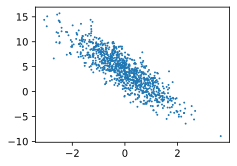

In [21]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1);

def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

batch_size=10

for X,y in data_iter(batch_size,features,labels):
    print(X)
    print(y)
    break

In [22]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
print(w,b)

def linreg(X,w,b):
    return torch.mm(X,w)+b

def squared_loss(y_hat,y):
    return(y_hat-y.view(y_hat.size()))**2/2

def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

tensor([[-0.0092],
        [ 0.0081]], requires_grad=True) tensor([0.], requires_grad=True)


In [23]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d,loss %f' % (epoch+1,train_l.mean().item()))

epoch 1,loss 0.045517
epoch 2,loss 0.000189
epoch 3,loss 0.000051


In [24]:
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 1.9991],
        [-3.3986]], requires_grad=True)
4.2 
 tensor([4.1990], requires_grad=True)
